## Observations and Insights

This studylooked at various drug regimens for cancer treatment. The following four drugs have shown the most promising in terms of tumor size reduction: Capomulin, Ramicane, Infubinol, and Ceftamin.

We noted three observations of the drug and its effectiveness. The first being that Ramicane and Capomulin had 1/3 of the deaths compared to the placebo. These where the only outliers of the drug regimens. The second being that Ramicane and Capomulin where at the lower bound of the number of metastatic sites compared to all drug regimens. Finally, we noted that Capomulin was the drug of interest. Our recommendation, based on this study, would be to increase use of Ramicane.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
mean_age =combined_df.groupby('Drug Regimen').mean()['Age_months']
mean_metasites = combined_df.groupby('Drug Regimen').mean()['Metastatic Sites']
combined_df.groupby('Drug Regimen').mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [3]:
#there are 10 time points.  The mouse may die,
#but there shouldn't be any counts greater than 10
a =combined_df['Mouse ID'].value_counts()
a = pd.DataFrame(a)
a=a[a['Mouse ID']<10]
b = combined_df[['Mouse ID', 'Drug Regimen']].drop_duplicates()
b = b.reset_index()
a =a.reset_index()
#c = pd.merge(a,b, on = 'Mouse ID',how = 'left')
c =a.merge(b,left_on='index', right_on = 'Mouse ID')
d =c.groupby('Drug Regimen').count()
d.sort_values('index_x')['index_x']

Drug Regimen
Capomulin     4
Ramicane      5
Zoniferol    11
Ceftamin     12
Naftisol     12
Stelasyn     13
Ketapril     14
Placebo      14
Infubinol    16
Propriva     17
Name: index_x, dtype: int64

In [4]:
clean_data = combined_df.copy()
clean_data =clean_data.set_index('Mouse ID')
clean_data = clean_data.drop(index = 'g989')
clean_data = clean_data.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_data[['Drug Regimen']].drop_duplicates()
drug_regimen = drug_regimen.sort_values(by = "Drug Regimen")
drug_regimen = drug_regimen.set_index("Drug Regimen")

drug_regimen['Mean']=clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'].values
drug_regimen['Median']= clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)'].values
drug_regimen['Variance'] = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)'].values
drug_regimen['Standard Deviation'] = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)'].values
drug_regimen['Standard Error of Measure'] = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'].values

drug_regimen

,Mean,Median,Variance,Standard Deviation,Standard Error of Measure
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

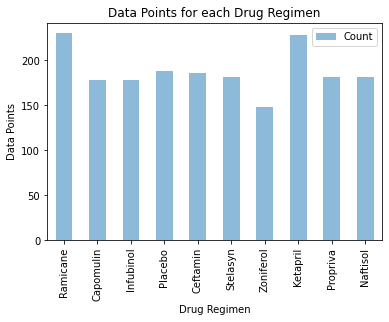

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_points = clean_data[['Drug Regimen']].drop_duplicates()
regimen_points['Count'] = clean_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].values
regimen_points
regimen_points.plot.bar('Drug Regimen','Count',alpha = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title("Data Points for each Drug Regimen")


plt.show()

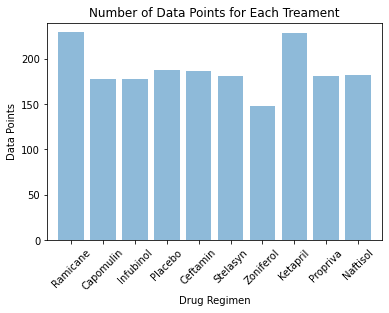

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(regimen_points['Count']))
plt.bar(x_axis, regimen_points['Count'], alpha=0.5)
plt.xticks(x_axis,regimen_points['Drug Regimen'])
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen_points['Count'])+10)

plt.title("Number of Data Points for Each Treament")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

## Pie plots

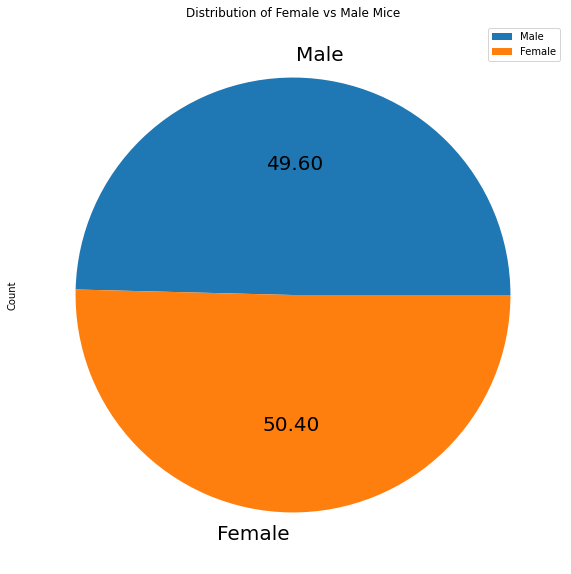

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_data[['Sex']].drop_duplicates()
temp_sex = clean_data[['Mouse ID','Sex']].drop_duplicates()
mouse_sex['Count'] = temp_sex.groupby('Sex').count().values
mouse_sex = mouse_sex.set_index('Sex')
mouse_sex.plot.pie(y ='Count', figsize = (10,10),fontsize = 20,autopct = '%.2f')
plt.title('Distribution of Female vs Male Mice')
plt.show()

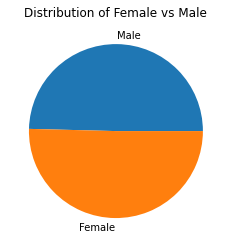

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex.Count.values,labels = mouse_sex.index.values)
explode=(.1,0)

plt.title("Distribution of Female vs Male")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
initial_timepoint = clean_data[clean_data['Timepoint']==0]
final_timepoint_45 = clean_data[clean_data['Timepoint']==45]
final_timepoint = clean_data.drop_duplicates(subset='Mouse ID',keep='last')
initial_tumor_volume = initial_timepoint.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']]
final_tumor_volume = final_timepoint_45.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']]
top_four = ((final_tumor_volume-initial_tumor_volume)/initial_tumor_volume).sort_values('Tumor Volume (mm3)')
placebo = top_four[top_four.index=='Placebo']
top_four =top_four.head(4)
top_four =top_four.append(placebo)

final_timepoint = final_timepoint.set_index('Drug Regimen')
final_timepoint_reduced = final_timepoint[["Tumor Volume (mm3)"]]

output = pd.merge(top_four,final_timepoint_reduced,on = "Drug Regimen",how = 'left')
output = output[['Tumor Volume (mm3)_y']]
output.columns = ['Final Tumor Volume']
tumor_sizes = output['Final Tumor Volume'].values

quartiles = output['Final Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)




capomulin=output[output.index=='Capomulin']
ramicane=output[output.index=='Ramicane']
infubinol=output[output.index=='Infubinol']
ceftamin=output[output.index=='Ceftamin']
placebo=output[output.index=='Placebo']



capomulin_quartiles = capomulin['Final Tumor Volume'].quantile([.25,.5,.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = upperq-lowerq
capomulin_lower_bound = lowerq - (1.5*iqr)
capomulin_upper_bound = upperq + (1.5*iqr)

ramicane_quartiles = ramicane['Final Tumor Volume'].quantile([.25,.5,.75])
ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = upperq-lowerq
ramicane_lower_bound = lowerq - (1.5*iqr)
ramicane_upper_bound = upperq + (1.5*iqr)

infubinol_quartiles = infubinol['Final Tumor Volume'].quantile([.25,.5,.75])
infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = upperq-lowerq
infubinol_lower_bound = lowerq - (1.5*iqr)
infubinol_upper_bound = upperq + (1.5*iqr)
i_min = infubinol["Final Tumor Volume"].min()
ceftamin_quartiles = ceftamin['Final Tumor Volume'].quantile([.25,.5,.75])
ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = upperq-lowerq
ceftamin_lower_bound = lowerq - (1.5*iqr)
ceftamin_upper_bound = upperq + (1.5*iqr)

placebo_quartiles = placebo['Final Tumor Volume'].quantile([.25,.5,.75])
placebo_lowerq = quartiles[0.25]
placebo_upperq = quartiles[0.75]
placebo_iqr = upperq-lowerq
placebo_lower_bound = lowerq - (1.5*iqr)
placebo_upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile for capomulin is {capomulin_lowerq}")
print(f"The upper quartile for capomulin is {capomulin_upperq}")
print(f"The inner quartile range for capomulin is {capomulin_iqr}")
print(f"The lower bound for capomulin is {capomulin_lower_bound}")
print(f"The upper bound for capomulin is {capomulin_upper_bound}")
print(f"Major outliers are {capomulin[(capomulin['Final Tumor Volume']>capomulin_upper_bound) |(capomulin['Final Tumor Volume']<capomulin_lower_bound)].values}")

print("--------------------")
print(f"The lower quartile for ramicane is {ramicane_lowerq}")
print(f"The upper quartile for ramicane is {ramicane_upperq}")
print(f"The inner quartile range for ramicane is {ramicane_iqr}")
print(f"The lower bound for ramicane is {ramicane_lower_bound}")
print(f"The upper bound for ramicane is {ramicane_upper_bound}")
print(f"Major outliers are {ramicane[(ramicane['Final Tumor Volume']>ramicane_upper_bound) |(ramicane['Final Tumor Volume']<ramicane_lower_bound)].values}")
print("--------------------")
print(f"The lower quartile for infubinol is {infubinol_lowerq}")
print(f"The upper quartile for infubinol is {infubinol_upperq}")
print(f"The inner quartile range for infubinol is {infubinol_iqr}")
print(f"The lower bound for infubinol is {infubinol_lower_bound}")
print(f"The upper bound for infubinol is {infubinol_upper_bound}")
print(f"Major outliers are {infubinol[(infubinol['Final Tumor Volume']>infubinol_upper_bound) |(infubinol['Final Tumor Volume']<infubinol_lower_bound)].values}")
print(f"Minor outlier is {i_min}")
print("--------------------")
print(f"The lower quartile for ceftamin is {ceftamin_lowerq}")
print(f"The upper quartile for ceftamin is {ceftamin_upperq}")
print(f"The inner quartile range for ceftamin is {ceftamin_iqr}")
print(f"The lower bound for ceftamin is {ceftamin_lower_bound}")
print(f"The upper bound for ceftamin is {ceftamin_upper_bound}")
print(f"Major outliers are {ceftamin[(ceftamin['Final Tumor Volume']>ceftamin_upper_bound) |(ceftamin['Final Tumor Volume']<ceftamin_lower_bound)].values}")
print("--------------------")

The lower quartile for capomulin is 38.75326548
The upper quartile for capomulin is 62.03059364
The inner quartile range for capomulin is 23.277328159999996
The lower bound for capomulin is 3.837273240000009
The upper bound for capomulin is 96.94658587999999
Major outliers are []
--------------------
The lower quartile for ramicane is 38.75326548
The upper quartile for ramicane is 62.03059364
The inner quartile range for ramicane is 23.277328159999996
The lower bound for ramicane is 3.837273240000009
The upper bound for ramicane is 96.94658587999999
Major outliers are []
--------------------
The lower quartile for infubinol is 38.75326548
The upper quartile for infubinol is 62.03059364
The inner quartile range for infubinol is 23.277328159999996
The lower bound for infubinol is 3.837273240000009
The upper bound for infubinol is 96.94658587999999
Major outliers are []
Minor outlier is 36.321345799999996
--------------------
The lower quartile for ceftamin is 38.75326548
The upper quarti

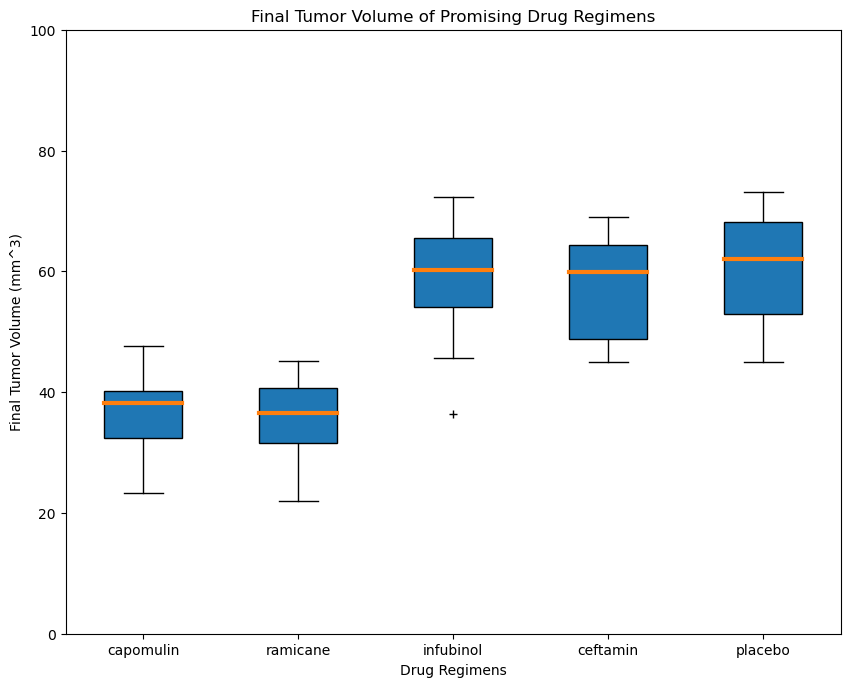

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize = (10,8), dpi = 100)
plt.style.use('default')
plt.boxplot([capomulin['Final Tumor Volume'],ramicane['Final Tumor Volume'],
             infubinol['Final Tumor Volume'],ceftamin['Final Tumor Volume'],
             placebo['Final Tumor Volume']], labels = ["capomulin","ramicane","infubinol","ceftamin","placebo"],
           patch_artist = True, medianprops = {'linewidth':3},sym='+')

plt.title("Final Tumor Volume of Promising Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm^3)")
plt.ylim(0,100)

plt.show()

## Line and scatter plots

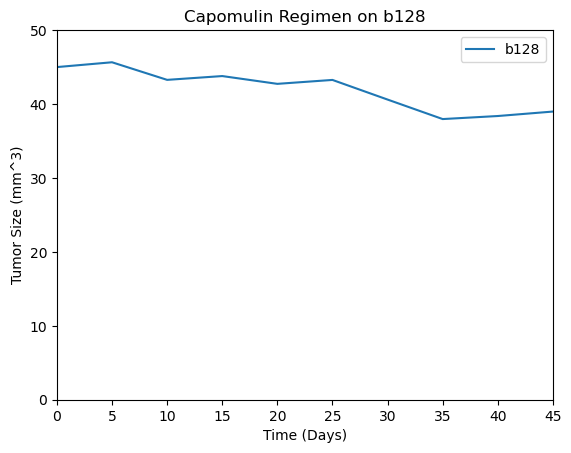

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = 'b128'
capomulin_df = clean_data[clean_data['Drug Regimen']=="Capomulin"]
mouse_id_df = capomulin_df[capomulin_df['Mouse ID']==mouse_id]

mouse_id_df.set_index('Timepoint', inplace = True)
mouse_id_df["Tumor Volume (mm3)"].plot(label=mouse_id)
plt.figure(1)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f"Capomulin Regimen on {mouse_id}")
plt.legend()
plt.ylim(0,50)

plt.show()

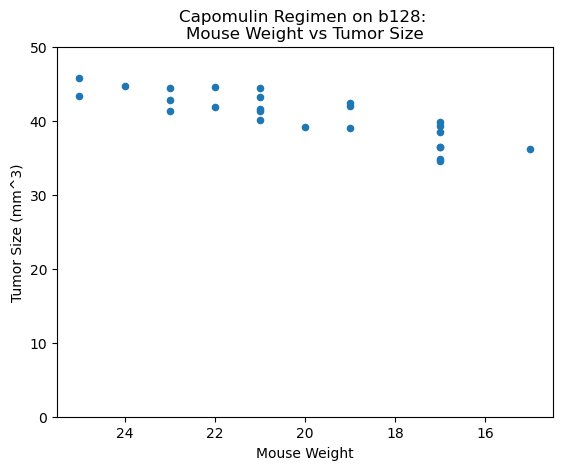

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_data[clean_data['Drug Regimen']=="Capomulin"]
capomulin_groupby_weight = capomulin_df.groupby('Mouse ID').mean()
capomulin_groupby_weight =capomulin_groupby_weight.reset_index()
capomulin_df_reduced =capomulin_groupby_weight[['Weight (g)', 'Tumor Volume (mm3)']]

capomulin_df_reduced.plot.scatter('Weight (g)','Tumor Volume (mm3)').invert_xaxis()

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f'Capomulin Regimen on {mouse_id}: \nMouse Weight vs Tumor Size')

plt.ylim(0,50)


plt.show()

The correlation between weight and tumor size is 0.84
The r-squared value is: 0.8419363424694718


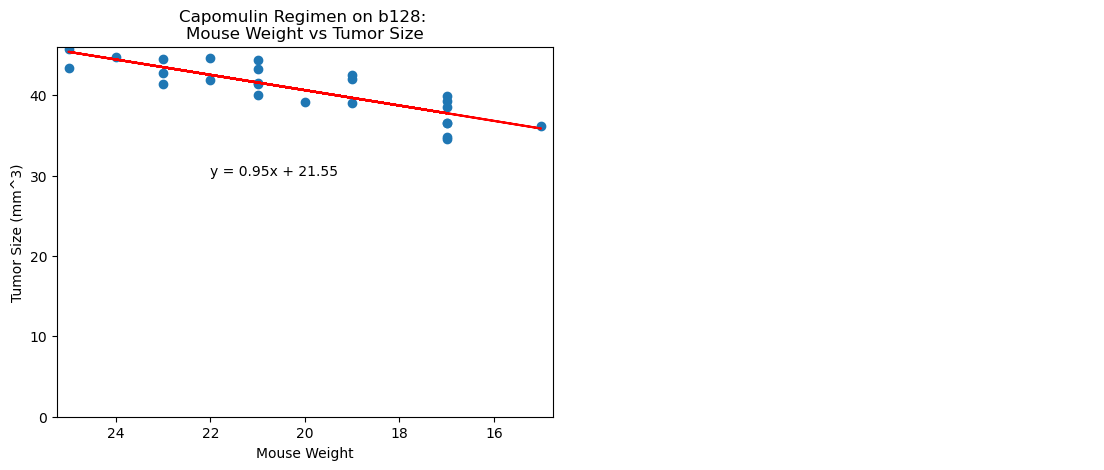

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

fig , ax = plt.subplots()
x_values =capomulin_groupby_weight['Weight (g)']
y_values =capomulin_groupby_weight['Tumor Volume (mm3)']

#Correlation
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between weight and tumor size is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

ax.set_xlim(25.25,14.75)
ax.set_ylim(0,50)

plt.annotate(line_eq,(6,10), color = "red")

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f"Capomulin Regimen on {mouse_id}: \nMouse Weight vs Tumor Size")
plt.ylim(0,46)
ax.text(22,30,line_eq)

print(f"The r-squared value is: {rvalue}")
plt.show()